In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#lendo arquivos
df_min = pd.DataFrame({})
for ano in ["2017","2018","2019"]:
    log = open("data_vss/"+ano+"/log.txt",'r')
    for linha in range(3):
        log.readline()
    for caminho in log:
        caminho = caminho.strip()[:-2]
        df2 = pd.read_csv("data_vss/"+ano+"/"+caminho,skiprows=24,sep="\s+",usecols=[0,1,2,3,4,5,6])
        df_min = pd.concat([df_min, df2])
    log.close()

df_min

,DATE,TIME,DOY,VSSX,VSSY,VSSZ,VSSG
0,2017-01-01,00:00:00.000,1,16701.6,-6959.5,-14647.2,-0.3
1,2017-01-01,00:01:00.000,1,16701.6,-6959.3,-14647.2,-0.3
2,2017-01-01,00:02:00.000,1,16701.5,-6959.3,-14647.1,-0.3
3,2017-01-01,00:03:00.000,1,16702.1,-6959.3,-14647.2,-0.3
4,2017-01-01,00:04:00.000,1,16702.2,-6959.5,-14647.1,-0.3
...,...,...,...,...,...,...,...
1435,2019-12-31,23:55:00.000,365,16431.9,-6913.2,-14979.0,0.2
1436,2019-12-31,23:56:00.000,365,16432.1,-6913.3,-14979.1,0.2
1437,2019-12-31,23:57:00.000,365,16432.0,-6913.2,-14979.1,0.2
1438,2019-12-31,23:58:00.000,365,16432.1,-6913.3,-14979.0,0.2


In [3]:
#mudando o range: minutos -> dias (meia noite)
horario = "00:00:00.000"
df_dia = df_min[df_min.TIME == horario ].reset_index(drop=True)
#excuindo outliers
df_dia = df_dia[df_dia.VSSX != 99999.0]
df_dia = df_dia[df_dia.VSSY != 99999.0]
df_dia = df_dia[df_dia.VSSZ != 99999.0]
df_dia.head()

,DATE,TIME,DOY,VSSX,VSSY,VSSZ,VSSG
0,2017-01-01,00:00:00.000,1,16701.6,-6959.5,-14647.2,-0.3
1,2017-01-02,00:00:00.000,2,16714.7,-6967.7,-14644.2,-0.3
2,2017-01-03,00:00:00.000,3,16716.4,-6964.4,-14645.7,-0.2
3,2017-01-04,00:00:00.000,4,16710.7,-6959.6,-14647.0,-0.3
4,2017-01-05,00:00:00.000,5,16691.8,-6967.6,-14650.9,-0.4


In [4]:
#calculando a resultante
df_dia['F'] = (df_dia.VSSX**2 + df_dia.VSSY**2 + df_dia.VSSZ**2)**0.5
df_dia.head()

,DATE,TIME,DOY,VSSX,VSSY,VSSZ,VSSG,F
0,2017-01-01,00:00:00.000,1,16701.6,-6959.5,-14647.2,-0.3,23279.144113
1,2017-01-02,00:00:00.000,2,16714.7,-6967.7,-14644.2,-0.3,23289.109752
2,2017-01-03,00:00:00.000,3,16716.4,-6964.4,-14645.7,-0.2,23290.286061
3,2017-01-04,00:00:00.000,4,16710.7,-6959.6,-14647.0,-0.3,23285.577847
4,2017-01-05,00:00:00.000,5,16691.8,-6967.6,-14650.9,-0.4,23276.866366


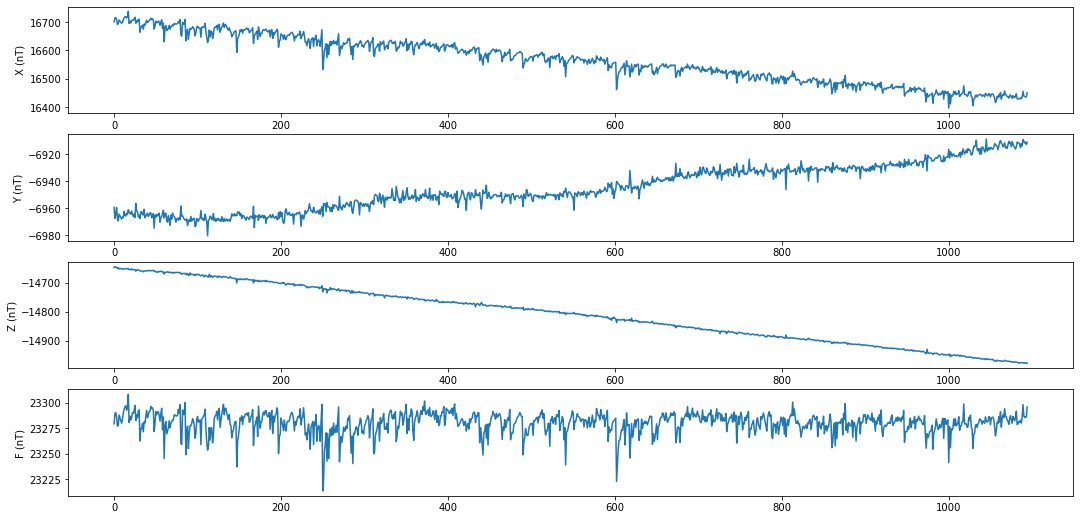

In [5]:
#visualizando pra verificar se está tudo ok
plt.figure(figsize=(18,9))

plt.subplot(4,1,1)
plt.plot(df_dia.index,df_dia.VSSX)
plt.ylabel("X (nT)")

plt.subplot(4,1,2)
plt.plot(df_dia.index,df_dia.VSSY)
plt.ylabel("Y (nT)")

plt.subplot(4,1,3)
plt.plot(df_dia.index,df_dia.VSSZ)
plt.ylabel("Z (nT)")

plt.subplot(4,1,4)
plt.plot(df_dia.index,df_dia.F)
plt.ylabel("F (nT)")

plt.show()

In [6]:
#pronto, agora é só salvar
df_dia.to_csv("vss_xyz_dia_2017-2019")